[물꼬기]

[개발 주제: 길이에 따른 생선 무게 예측 모델]  
- 데이터셋: fish.csv  
  
  
- 피쳐/특성/데이터: 길이  
- 타겟/정답/레이블: 무게  
  

- 학습종류: 지도학습-회귀  
- 알고리즘: 데이터셋 분석 후 결정

In [151]:
# [1-1] 모듈 로딩
from sklearn.neighbors import KNeighborsRegressor												# 머신러닝 알고리즘 모듈
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error	# 성능평가 모듈
from sklearn.model_selection import train_test_split											# 데이터셋 분리 모듈
import matplotlib.pyplot as plt
import pandas as pd

In [152]:
## [1-2] 데이터 준비
# 농어 무게/길이 데이터

# 앞 뒤 바로 삭제
# 1, 2 행만 사용
fish_df = pd.read_csv('../data/fish.csv', skiprows = 73, header = None, skipfooter = 31, engine = 'python', usecols=[1, 2])

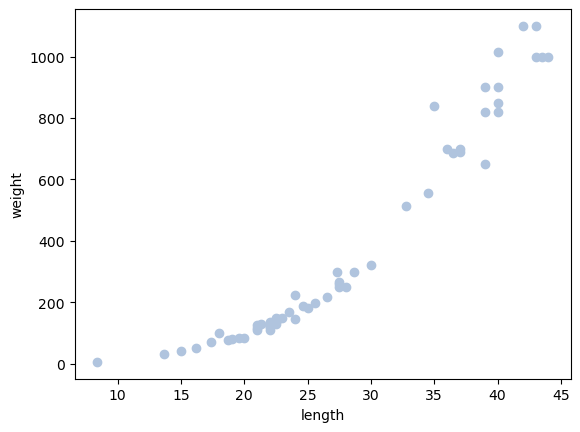

In [153]:
## [1-3] 탐색적 분석 - 시각화
length = fish_df[2]
weight = fish_df[1]
plt.plot(length, weight, 'o', color='#B0C4DE')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [154]:
## [1-4] 탐색적 분석 결과
# - KNN 회귀 분석

In [155]:
# [2-1] 데이터셋 준비 =>
# (1) 피쳐와 타겟 분리

# (2) 학습용, 검증용, 테스트용 분리
# 학습용 : 규칙과 패턴 찾기 위해 사용되는 데이터셋
# 검증용 : 모델 학습 진행이 제대로 되고 있는지 확인용 데이터셋
# 테스트용 : 학습 완료 후 검사용 데이터셋

# 피쳐와 타겟 분리
featureDF = fish_df[fish_df.columns[-1:]] # 슬라이싱 = 2차원 (피쳐)
targetSR = fish_df[fish_df.columns[0]]	  # 인덱싱 = 1차원	 (타겟)

In [156]:
# 전체 데이터셋에서 학습용 / 테스트용 분리 (70:30 or 80:20)
# 학습용 : 테스트용
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, random_state=10)

In [157]:
# 인덱스 리셋
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(x_train.index, x_test.index)
print(y_train.index, y_test.index)

RangeIndex(start=0, stop=42, step=1) RangeIndex(start=0, stop=14, step=1)
RangeIndex(start=0, stop=42, step=1) RangeIndex(start=0, stop=14, step=1)


In [158]:
# [2-2] KNN 알고리즘 객체 / 인스턴스 생성
fish_model = KNeighborsRegressor()

In [159]:
# [2-3] 학습 진행
fish_model.fit(x_train, y_train)

KNeighborsRegressor()

In [160]:
# [2-4] KNN
print(fish_model.n_features_in_)
print(fish_model.n_samples_fit_)	# 몇 개 학습?
print(fish_model.effective_metric_) # 선 그리는 방법?

1
42
euclidean


학습 평가

In [161]:
# [3-1] 훈련데이터 셋으로 예측 => predict(2D 피쳐 데이터)
pre_weight = fish_model.predict(x_train)

# [3-2] 모델 성능 평가 => score(2D 피쳐 데이터, 1D 타겟 데이터) : 모델 적합도
score = fish_model.score(x_train, y_train)
print(f'성능 : {score}')

# [3-3] 모델 손실 평가 => rmse, mse, mae => 1D 타겟 데이터, 1D 예측값
rmse = root_mean_squared_error(y_train, pre_weight)
print(f'오차: {rmse}')

성능 : 0.9784573278997548
오차: 54.16730493396846


In [162]:
# [4-1] 테스트데이터 셋으로 예측 => predict(2D 피쳐 데이터)
pre_weight = fish_model.predict(x_test)

# [4-2] 모델 성능 평가 => score(2D 피쳐 데이터, 1D 타겟 데이터) : 모델 적합도
score = fish_model.score(x_test, y_test)
print(f'성능 : {score}')

# [4-3] 모델 손실 평가 => rmse, mse, mae => 1D 타겟 데이터, 1D 예측값 rmse = root_squared_error(y_train, pre_v)
rmse = root_mean_squared_error(y_test, pre_weight)
print(f'오차 : {rmse}')

성능 : 0.9557072737458564
오차 : 44.636380101565464


In [163]:
# 5 최근접 이웃 알고리즘의 동작원리 확인
# K개 만큼 가까이 있는 데이터를 추출
# 회귀 => K의 값을 모두 더한 후 평균

In [164]:
# 데이터 지정
x_train.iloc[0], y_train.iloc[0]

(2    19.0
 Name: 0, dtype: float64,
 np.float64(80.0))

In [165]:
# 이웃 찾기 : kneighbors(2D)
# nd.array 반환
distance, indices = fish_model.kneighbors([[19.0]])
print(f'distance = {distance} / indices = {indices}')

## - 19.0 데이터랑 거리가 가까운 K개 즉, 5개 데이터의 2D 인덱스
print(f'distanse=> {distance}\nindices => {indices}, {type(indices)}')

# 차원 축소 후 저장
# reshape에서 -1의 의미 : 맘대로? / 원소 수는 안 바뀐다
# -> 이웃 데이터 인덱스 2D ==> 1D
neighbor_idx = indices.reshape(-1)
data_idx = indices

distance = [[0.  0.3 0.6 1.  1. ]] / indices = [[ 0  1 32 41 18]]
distanse=> [[0.  0.3 0.6 1.  1. ]]
indices => [[ 0  1 32 41 18]], <class 'numpy.ndarray'>


In [166]:
x_train.iloc[neighbor_idx], y_train[neighbor_idx]

(       2
 0   19.0
 1   18.7
 32  19.6
 41  20.0
 18  18.0,
 0      80.0
 1      78.0
 32     85.0
 41     85.0
 18    100.0
 Name: 1, dtype: float64)

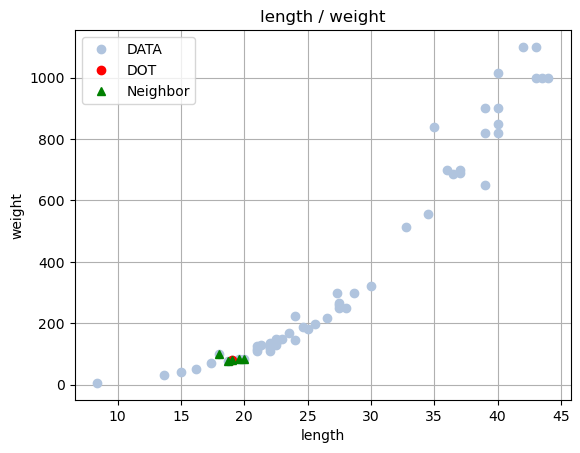

In [167]:
length = fish_df[2]
weight = fish_df[1]
plt.plot(length, weight, 'o', color='#B0C4DE', label='DATA')
plt.plot(x_train.iloc[0], y_train.iloc[0], 'o', color='red', label='DOT')
plt.plot(x_train.iloc[neighbor_idx], y_train[neighbor_idx], '^', color='green', label='Neighbor')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('length / weight')
plt.legend()
plt.grid()
plt.show()

In [168]:
# 예측값 : K개 즉, 5개 이웃 데이터의 무게 weight를 평균 낸 것으로 예측값 반환
pre_weight = y_train[neighbor_idx].mean()

print(f'길이 19.0 생선의 무게 예측은 {pre_weight}로 예측됩니다.')

길이 19.0 생선의 무게 예측은 85.6로 예측됩니다.


[6] 최적의 K 찾기 <hr>
- 최근접 이웃 갯수 => k
- 기본값 : 5
- 나의 데이터에 최적인 K 찾기
	* 1 ~ 전체데이터 수만큼 K값 변경한 KNR 인스턴스 생성
	* 학습, 예측, 성능평가, 비용계산 결과 비교
	* 성능평가 높고, 비용계산 낮은 K 결정

In [169]:
DATANUMS = x_train.shape[0]

# K 갯수에 따른 모델 성능과 비용함수값 지정
HISTORYS = [[], []]					# [ score_list, rmse_list ]
HISTORYS = {'score':[], 'rmse':[]}

# K 갯수에 따른 모델 성능 및 비용 계산
for k in range(1, DATANUMS+1):
	# KNR 인스턴스 생성
	model = KNeighborsRegressor(n_neighbors=k)
	
	# KNR 학습 및 예측
	model.fit(x_train, y_train)
	pre_ = model.predict(x_train)

	# KNR 성능평가 및 비용계산
	score = model.score(x_train, y_train)			## 0.0 ~ 1.0
	rmse = root_mean_squared_error(y_train, pre_)	## 0.0 ~ 

	# 저장
	HISTORYS['score'].append(score)
	HISTORYS['rmse'].append(rmse)

In [170]:
print("HISTORYS['score']:", HISTORYS['score'])
print("HISTORYS['rmse']:", HISTORYS['rmse'])

HISTORYS['score']: [0.9839739407771927, 0.9815504872688875, 0.9819388154902648, 0.9815355663609397, 0.9784573278997548, 0.9744829938405256, 0.9755266690443957, 0.9744696460932932, 0.9774430654930567, 0.9708999569730309, 0.9667629106605549, 0.9596155427769033, 0.9464087815683855, 0.9425253094414373, 0.9372540957641863, 0.9354874768657034, 0.9279569190067318, 0.9194785810548529, 0.9079268138386352, 0.896120731642103, 0.8787333545738312, 0.858535401167817, 0.8350488711397113, 0.8153783544646639, 0.791281881411492, 0.7599836619677534, 0.7251140268249456, 0.6882320118707485, 0.6497797664052141, 0.6112165371932946, 0.5730604885246238, 0.5296361386546657, 0.4923368316953145, 0.4435958284871272, 0.38749851331698826, 0.3405243565124938, 0.2913264188207596, 0.23141004568344303, 0.17534571521130493, 0.11286524666613473, 0.05455126182800751, 0.0]
HISTORYS['rmse']: [46.71978269682015, 50.12794404131815, 49.59758805366185, 50.148210247938344, 54.16730493396846, 58.95251014486959, 57.734310570959316,

In [176]:
print("SCORE", min(HISTORYS['score']), max(HISTORYS['score']))
print("RMSE", min(HISTORYS['rmse']), max(HISTORYS['rmse']))

SCORE 0.0 0.9839739407771927
RMSE 46.71978269682015 369.0518973715143


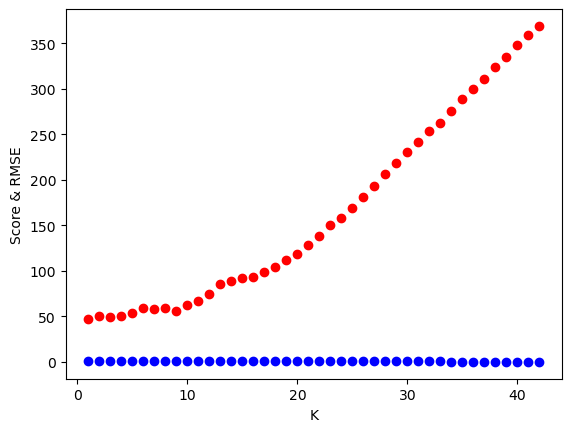

In [177]:
## 시각화
plt.plot(range(1, DATANUMS+1), HISTORYS['score'], 'bo', label='SCORE')
plt.plot(range(1, DATANUMS+1), HISTORYS['rmse'], 'ro', label='RMSE')
plt.xlabel('K')
plt.ylabel('Score & RMSE')
plt.show()

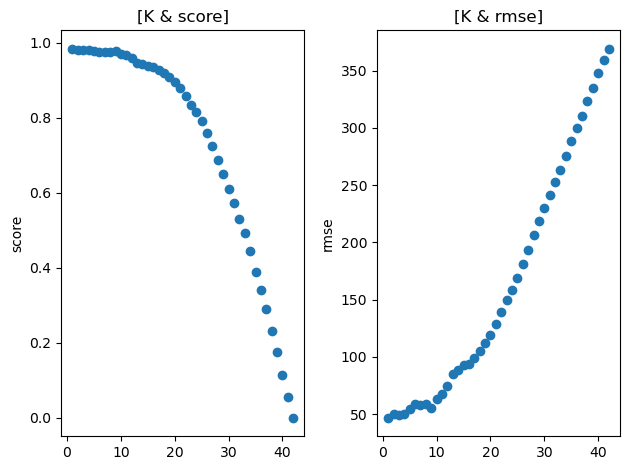

In [174]:
fig, axes = plt.subplots(1, 2)
axes = axes.flatten()
for ax, ylabel in zip(axes, ["score", "rmse"]):
	ax.plot(range(1, DATANUMS+1), HISTORYS[ylabel], 'o')
	ax.set_ylabel(ylabel)
	ax.set_title(f'[K & {ylabel}]')

plt.tight_layout() 
fig.subplots_adjust(wspace=0.3)  
plt.show()

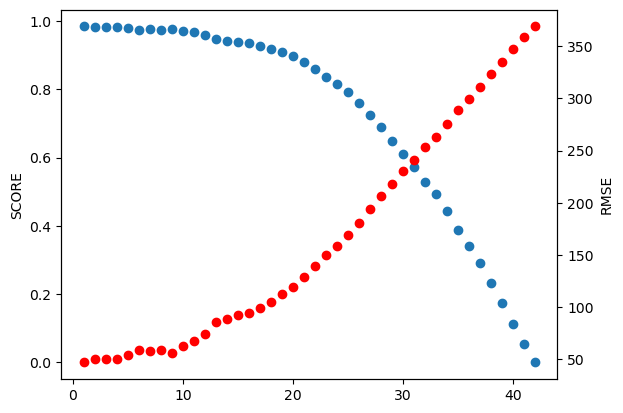

In [179]:
## 시각화 => 이중축
fig, axes1 = plt.subplots()
axes1.plot(range(1, DATANUMS+1), HISTORYS["score"], 'o', label='SCORE')
axes1.set_ylabel("SCORE")

axes2=axes1.twinx()
axes2.plot(range(1, DATANUMS+1), HISTORYS["rmse"], 'ro', label='RMSE')
axes2.set_ylabel("RMSE")

plt.show()

In [175]:
# KNR 인스턴스 생성
model = KNeighborsRegressor(n_neighbors=4)
	
# KNR 학습 및 예측
model.fit(x_test, y_test)
pre_ = model.predict(x_test)

# KNR 성능평가 및 비용계산
score = model.score(x_test, y_test)			    ## 0.0 ~ 1.0
rmse = root_mean_squared_error(y_test, pre_)	## 0.0 ~ 
print("score :", score, "rmse :", rmse)

score : 0.6702575099945594 rmse : 121.78960378162708


In [1]:
## ----------------------------------------------------------
## 함수기능 : 평가결과 반환 함수
## 함수이름 : checkModel
## 매개변수 : 학습용데이터셋, 테스트용데이터셋
## 함수결과 : 결과값DataFrame, 결과문자열
## ----------------------------------------------------------
def checkModel(trainDS, testDS, model):
	result = []		# 성능평가 결과 저장

	for ds in [trainDS, testDS]:
		## - 모델 즉, 수식에 데이터 적용해서 예측값
		pre_weight = model.predict(x_test)

		## - 모델 적합도 : 높을수록 좋음(1.0)
		score = model.score(x_test, y_test)

		## - 오차 계산 : 낮을수록 좋음(0.0)
		rmse = root_mean_squared_error(y_test, pre_)

		## - 데이터셋별 성능결과 저장
		result.append([score, rmse])

	return pd.DataFrame(result)